# Regression and Regularization

email: bgriebel+cheme545@uw.edu

[Poll Question](https://pollev.com/bgriebel)

### Imports

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

## 1. Linear Regression and Regularization

### Regularization

<font size=3> 

<font size=3> Linear regression can be impacted by the variability of the data, lets examine what happens when we take samples from data which have the same true line, but different variances. 

Text(0.5, 1.0, 'High Variance')

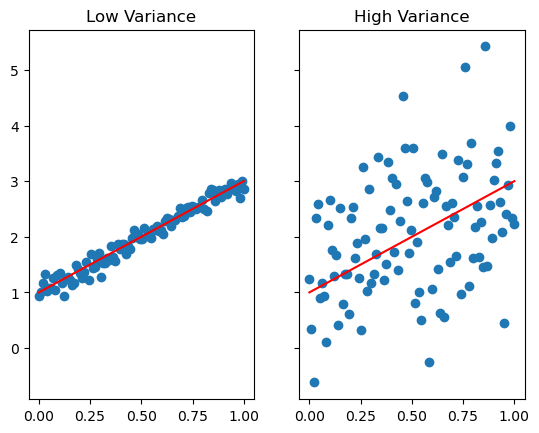

In [11]:
x=np.linspace(0,1,100)
y_low_var = 1+2*x+np.random.normal(loc=0, scale=0.1, size=100)
y_high_var = 1+2*x+np.random.normal(loc=0, scale=1.0, size=100)
fig, ax = plt.subplots(1,2, sharey=True, sharex=True)
ax[0].scatter(x, y_low_var)
ax[0].plot(x, 1+2*x, c="red")
ax[0].set_title("Low Variance")
ax[1].scatter(x, y_high_var)
ax[1].plot(x, 1+2*x, c="red")
ax[1].set_title("High Variance")

In [20]:
# Lets first examine the effects with the lower variance first
full_fit = LinearRegression().fit(x.reshape(-1,1), y_low_var)
print(f"The slope predicted by fitting to all the data is {full_fit.coef_[0]}")
sample_index = np.random.choice(list(range(100)), 10)
partial_fit = LinearRegression().fit(x[sample_index].reshape(-1,1), y_low_var[sample_index])
print(f"The slope predicted by fitting to a small sample is {partial_fit.coef_[0]}")

The slope predicted by fitting to all the data is 2.0165379983170286
The slope predicted by fitting to a small sample is 2.0203202604882016


In [21]:
# Now let us look at the case where we have much higher variance
full_fit = LinearRegression().fit(x.reshape(-1,1), y_high_var)
print(f"The slope predicted by fitting to all the data is {full_fit.coef_[0]}")
sample_index = np.random.choice(list(range(100)), 10)
partial_fit = LinearRegression().fit(x[sample_index].reshape(-1,1), y_high_var[sample_index])
print(f"The slope predicted by fitting to a small sample is {partial_fit.coef_[0]}")

The slope predicted by fitting to all the data is 1.3666570955026927
The slope predicted by fitting to a small sample is 4.353008107810305


<font size=3> As can be seen by this, when the slope of the true regression line is on the same order as the variability of the data, the predicted slopes can vary significantly based on the sampling. 

<font size=4> Let's consider a system with two variables, 

<font size=4>Consider the following dummy data, where we know the true function in two dimensions:

<font size=4>$$f(x0,x1) = 0.8x_0-0.2x_1+1.2$$

<font size=4>$$y = f(x0,x1)+\epsilon$$

In [22]:
def f(x0,x1):
    return .8*x0-.2*x1+1.2

def y(x0,x1):
    return f(x0,x1) + np.random.normal(scale=.02, size=x0.shape)

In [23]:
x0, x1 = np.random.normal(size=(2,200))
ys = y(x0,x1)

In [24]:
data=pd.DataFrame({'x0': x0, 'x1': x1, 'y': ys})

<Axes: title={'center': 'y vs x1'}, xlabel='x1', ylabel='y'>

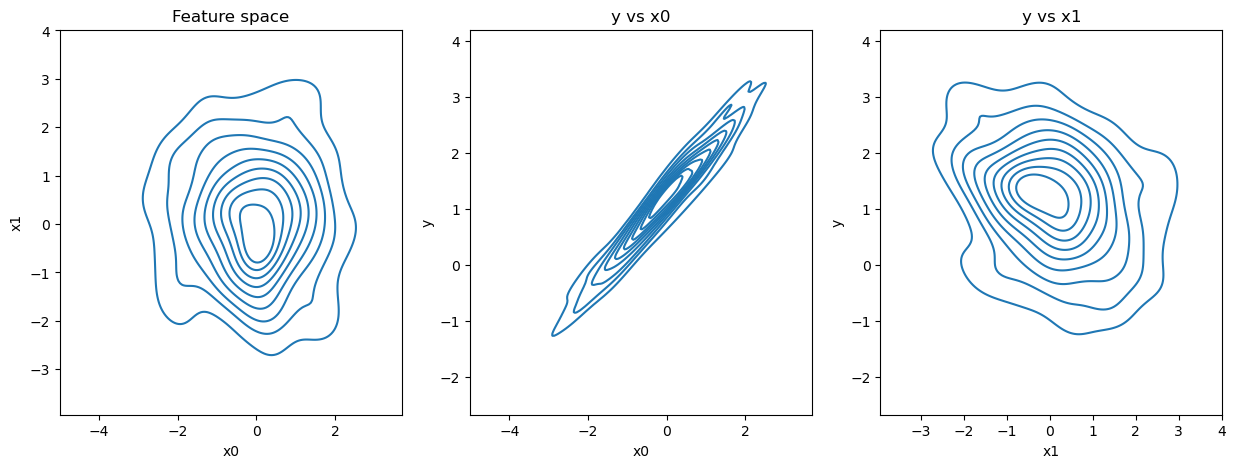

In [25]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
axes[0].set_xlabel('x0')
axes[0].set_ylabel('x1')
axes[0].set_title('Feature space')
sns.kdeplot(x=data['x0'], y=data['x1'], ax=axes[0])

axes[1].set_xlabel('x0')
axes[1].set_ylabel('y')
axes[1].set_title('y vs x0')
sns.kdeplot(x=data['x0'], y=data['y'], ax=axes[1])

axes[2].set_xlabel('x1')
axes[2].set_ylabel('y')
axes[2].set_title('y vs x1')
sns.kdeplot(x=data['x1'], y=data['y'], ax=axes[2])


<font size=4><center>__There is a much stronger relationship of $y$ to $x_0$ than $x_1$.__ If you were to fit a simple linear regressor to each feature, the difference between the line and the data (error) is the effect on y not captured by that single feature (the effect of the other feature as well as the unknown effect $\epsilon$):

In [26]:
def true_fx0(x0):
    return 0.8*x0+1.2
def true_fx1(x1):
    return -0.2*x1+1.2

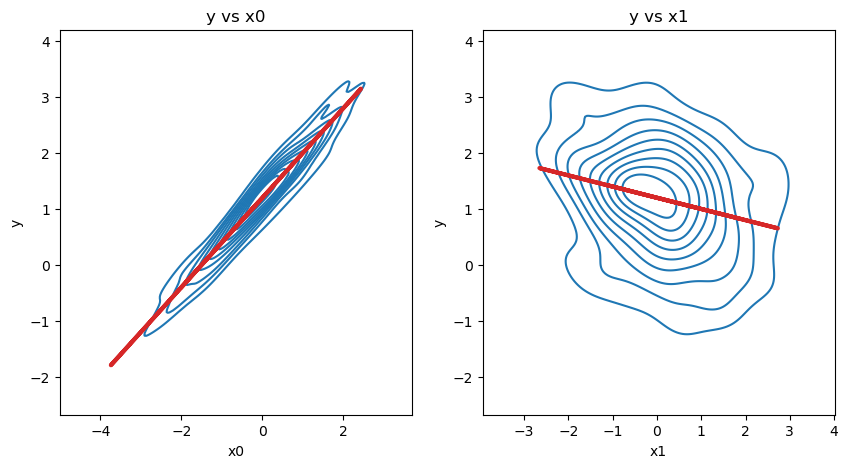

In [27]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].set_xlabel('x0')
axes[0].set_ylabel('y')
axes[0].set_title('y vs x0')
sns.kdeplot(x=data['x0'], y=data['y'], ax=axes[0])
axes[0].plot(data['x0'], true_fx0(data['x0']), c='tab:red', lw=3)

axes[1].set_xlabel('x1')
axes[1].set_ylabel('y')
axes[1].set_title('y vs x1')
sns.kdeplot(x=data['x1'], y=data['y'], ax=axes[1])
axes[1].plot(data['x1'], true_fx1(data['x1']), c='tab:red', lw=3)

<font size=4>We saw in simple linear regression that the line of best fit is dependant on the sample of data, this is variance in a nutshell. Will the variance effect be less, the same, or greater for $x1$ compared to $x0?$

In [30]:
## x0 first
models_x0 = []
for i in range(8):
    data_sample = data.sample(n=10)
    
    model = sklearn.linear_model.LinearRegression()
    model.fit(data_sample['x0'].values.reshape(-1,1), data_sample['y'])
    models_x0.append(model)
    
## x1 first
models_x1 = []
for i in range(8):
    data_sample = data.sample(n=10)
    
    model = sklearn.linear_model.LinearRegression()
    model.fit(data_sample['x1'].values.reshape(-1,1), data_sample['y'])
    models_x1.append(model)

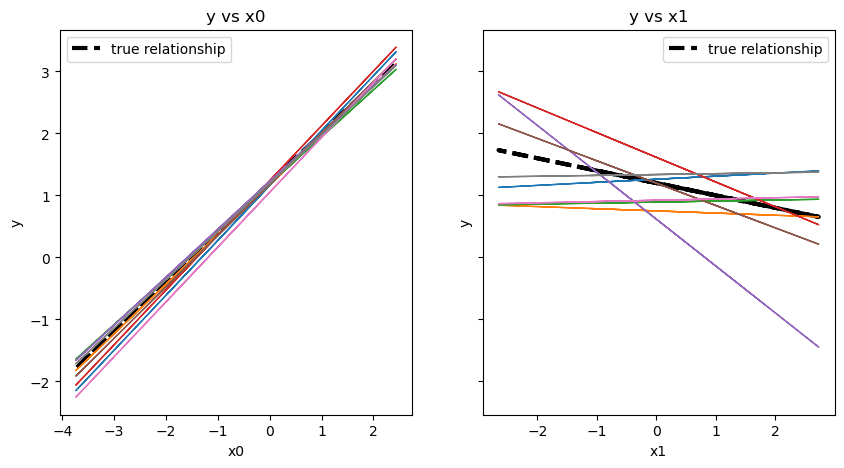

In [31]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
axes[0].set_xlabel('x0')
axes[0].set_ylabel('y')
axes[0].set_title('y vs x0')
axes[0].plot(data['x0'], true_fx0(data['x0']), c='k', ls='--', lw=3, label='true relationship')
for m in models_x0:
    axes[0].plot(data['x0'], m.predict(data['x0'].values.reshape(-1,1)), lw=1)
axes[0].legend()

axes[1].set_xlabel('x1')
axes[1].set_ylabel('y')
axes[1].set_title('y vs x1')
axes[1].plot(data['x1'], true_fx1(data['x1']), c='k', ls='--', lw=3, label='true relationship')
for m in models_x1:
    axes[1].plot(data['x1'], m.predict(data['x1'].values.reshape(-1,1)), lw=1)
axes[1].legend()

<font size=4><center>__What we see is a consequence of the true relationship of $x1$ and $y$ being a similar order of magnitude to the noise.__ Should $x_1$ be "trusted" as much as $x_0$ when fitting the model?

<font size=4>__If a linear model has a very high magnitude weight, it can be because of one of two reasons:__

<font size=4> 1. The true relationship is strong.

<font size=4> 2. The variance is high, leading to a weight that is very different from the true weight.

<font size=4><center>Model __regularization combats high variance by penalizing large relationships__, e.g. it is "cautious" and would rather assume no relationship (naive model). By doing this we help ensure that a model weight will only be high if it truly reduces the error significantly.

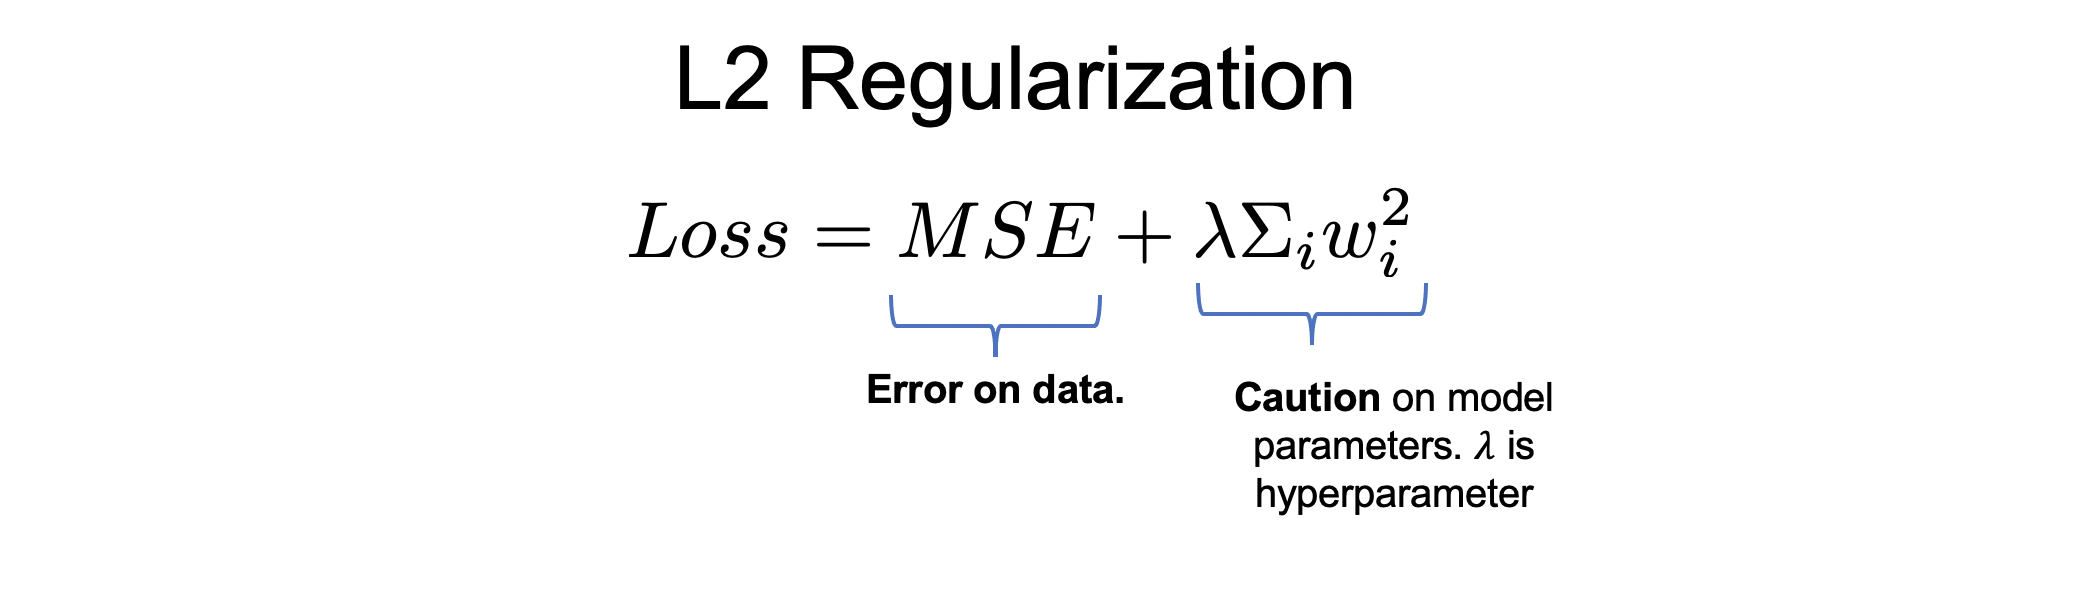

<font size=4><center>But won't this reduce the true relationship in addition to the noise? __Yes, but parameters with higher variance are effected to a greater extent.__ Consider our toy data, and say we are overly cautious and regularize to the point of using a naive model.

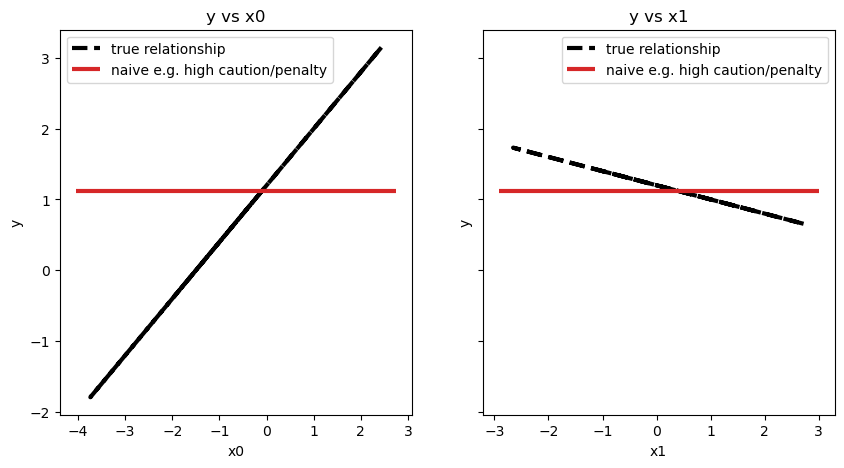

In [32]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
axes[0].set_xlabel('x0')
axes[0].set_ylabel('y')
axes[0].set_title('y vs x0')
axes[0].plot(data['x0'], true_fx0(data['x0']), c='k', ls='--', lw=3, label='true relationship')
axes[0].hlines(data['y'].mean(), *axes[0].get_xlim(), color='tab:red', lw=3, label='naive e.g. high caution/penalty')
axes[0].legend()

axes[1].set_xlabel('x1')
axes[1].set_ylabel('y')
axes[1].set_title('y vs x1')
axes[1].plot(data['x1'], true_fx1(data['x1']), c='k', ls='--', lw=3, label='true relationship')
axes[1].hlines(data['y'].mean(), *axes[1].get_xlim(), color='tab:red', lw=3, label='naive e.g. high caution/penalty')
axes[1].legend()

<font size=4><center>The MSE in the left case is much greater, which increases the loss. __Since we are minimizing the loss, a combination of error and caution__ the parameters that minimize the loss will only have large values when the relationship is high, and not when random noise effects the data heavily.

<font size=4> This can help with overfitting, since terms which are just due to noise in the training data will be punished. 

### Lasso vs Ridge

<font size=4> When discussing regularization, there are two common methods: 
- <font size=4> Lasso (L1 Regularization): The error term is the sum of the absolute vaules of the coefficients
- <font size=4> Ridge (L2 Regularization): The error term is the sum of the squares of the coefficients

<font size=4> One of the important differences between these two methods is that ridge regression will tend to end up with many small coefficients, while lasso regression will tend to send some of the coefficients to 0, and so can be used in feature selection. 

<font size=4> Let's try to understand this by examining a countour plot of the MSE. 
    
<font size=4> In this graphic the $\hat\beta$ represents the values of the parameters that give the smallest possible MSE, and the red lines represent countour lines, where the value of the MSE is the same all along the lines. 
    
<font size=4> The green areas represent the error terms, the sharp corners along the axis in the lasso regression case mean that it is likely to intersect the countour line on an axis, where one of coefficients is 0. 
    
<font size=4> This is why lasso regression can be used for feature selection, because it can reduce the values of coefficients to 0, where as ridge regression will not do this. 

<font size=4> 

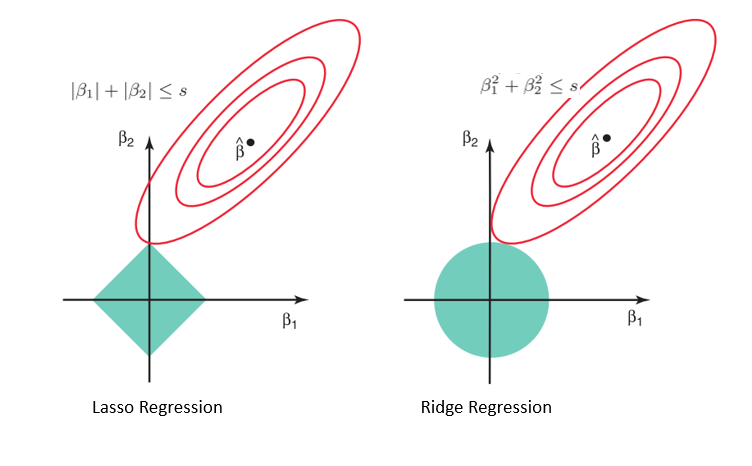

## 2. Logistic Regression

<font size=4>What if we want to use a linear regression type method for classification? We can use a logistic regression!

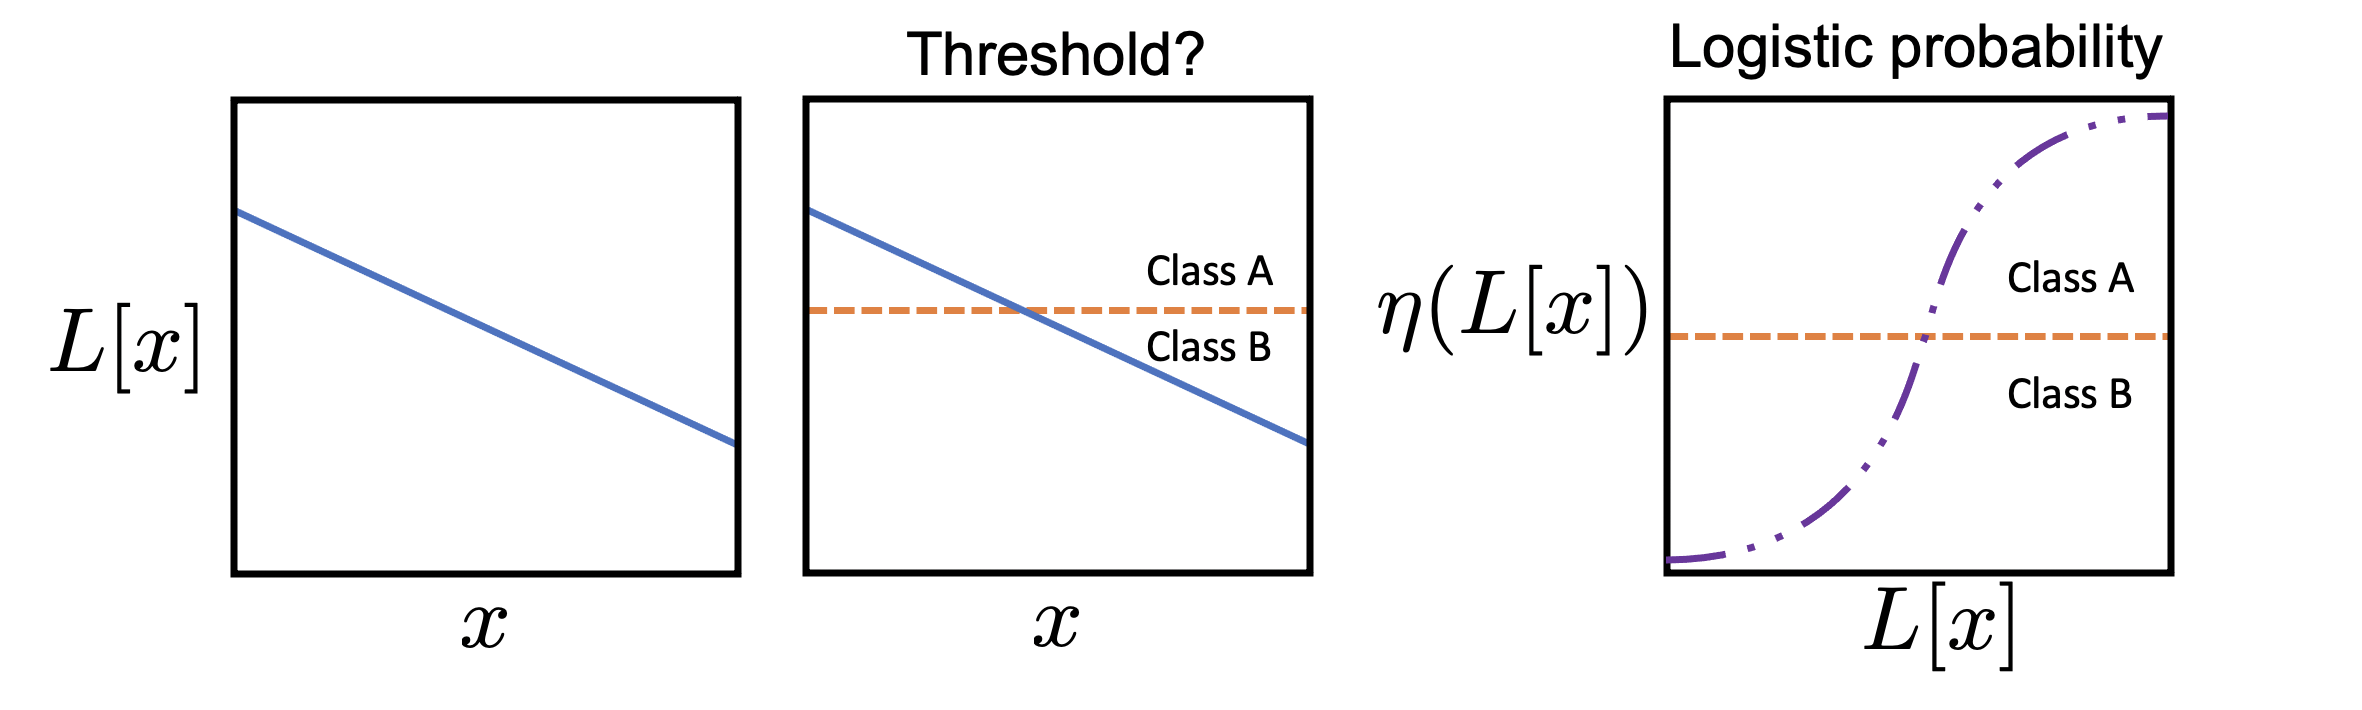

<font size=4> This technique uses a logistic function to take a continous linear regression line, and turn it into a form that can be used for classification. Specifically, it converts a linear relationship into one that produces probabilities. 
    $$p(x)=\frac{1}{1+e^{-(\beta_0+\beta_1x})}$$

<font size=4> But how do we fit this model? How do we evaluate the error? 
    
<font size=4><centered>If we have a model that predicts a false positive with a 95% probability worse than a model that predicts a false positive with 51% accuracy?
    
<font size=4> This idea leads us to the likelihood function. The likelihood function takes in a set of parameters, and gives back the probability of observing the data that we do observe. 
    
<font size=4> So, with logistic regression, for some parameters $\beta1$ and $\beta2$, for some given data, the liklihood function returns the probability of observing the given data, for those hyperparameters. 
$$\mathcal{L}((x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\ldots\vert \theta) = \prod_{i=1}^n p^{y^{(i)}}(1-p)^{1-y^{(i)}}$$

<font size=4> Now that we have the likelihood function, we want to maximize it!

<font size=4> This turns out to be easier if we take the log first, and if we take the negative of this so we are minimizing the function. Thus, the cost function becomes:
    $$\hat\beta=argmin[-\frac{1}{n}\sum^{n}_{i=1}(y^{(i)}\log p^{(i)}+(1-y^{(i)})\log(1-p^{(i)}))]$$

<font size=4> There is unfortunately not a formula for this, but we can use gradient descent to do the minimization, and find $\hat\beta$

## 3. KNN Regression

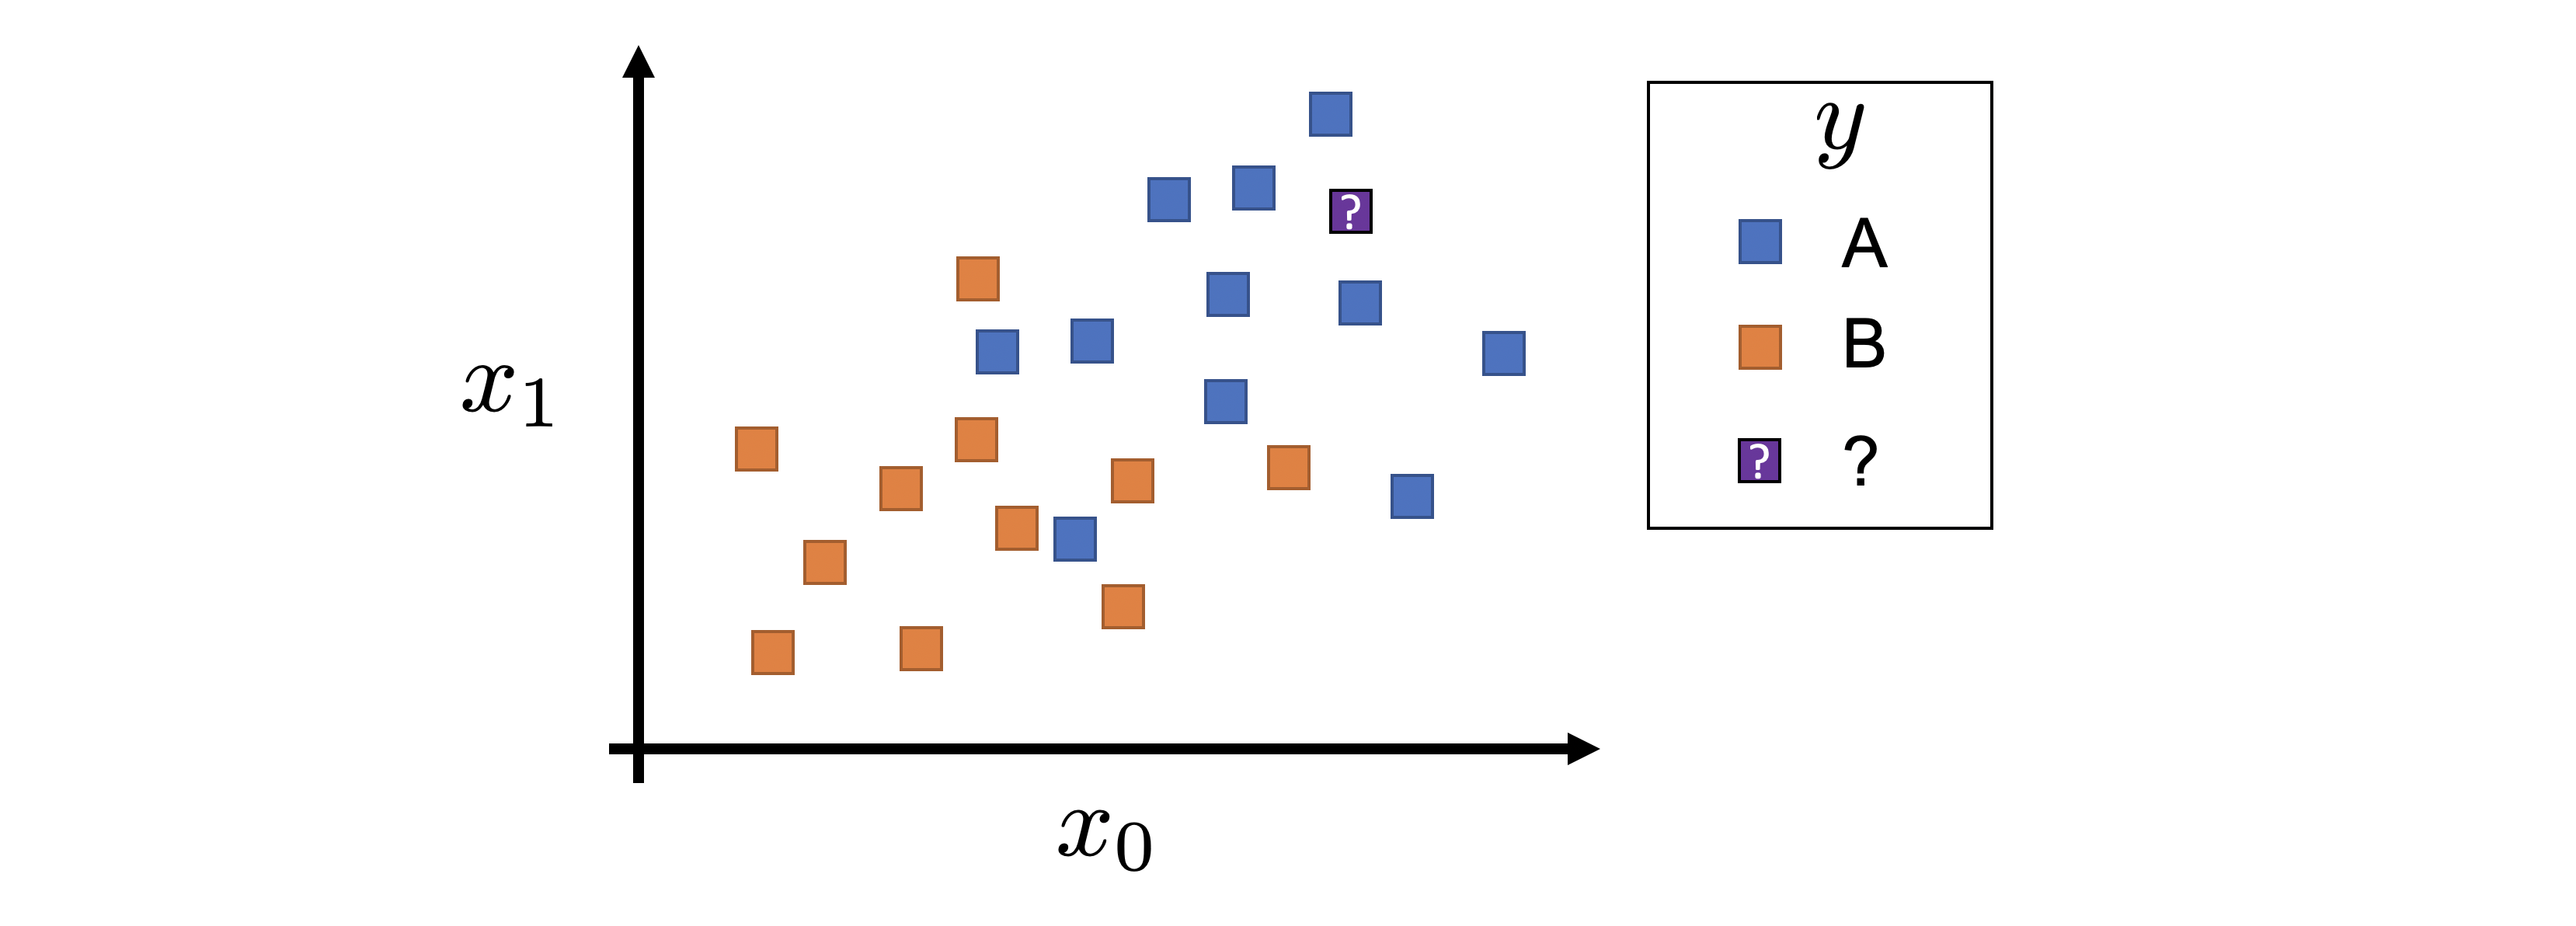

<font size=4><center>By inspection we would expect the new data point to be class A. K-Nearest Neigbor models (KNNs) formalize this principle using distance, in this example for 2 dimensions:

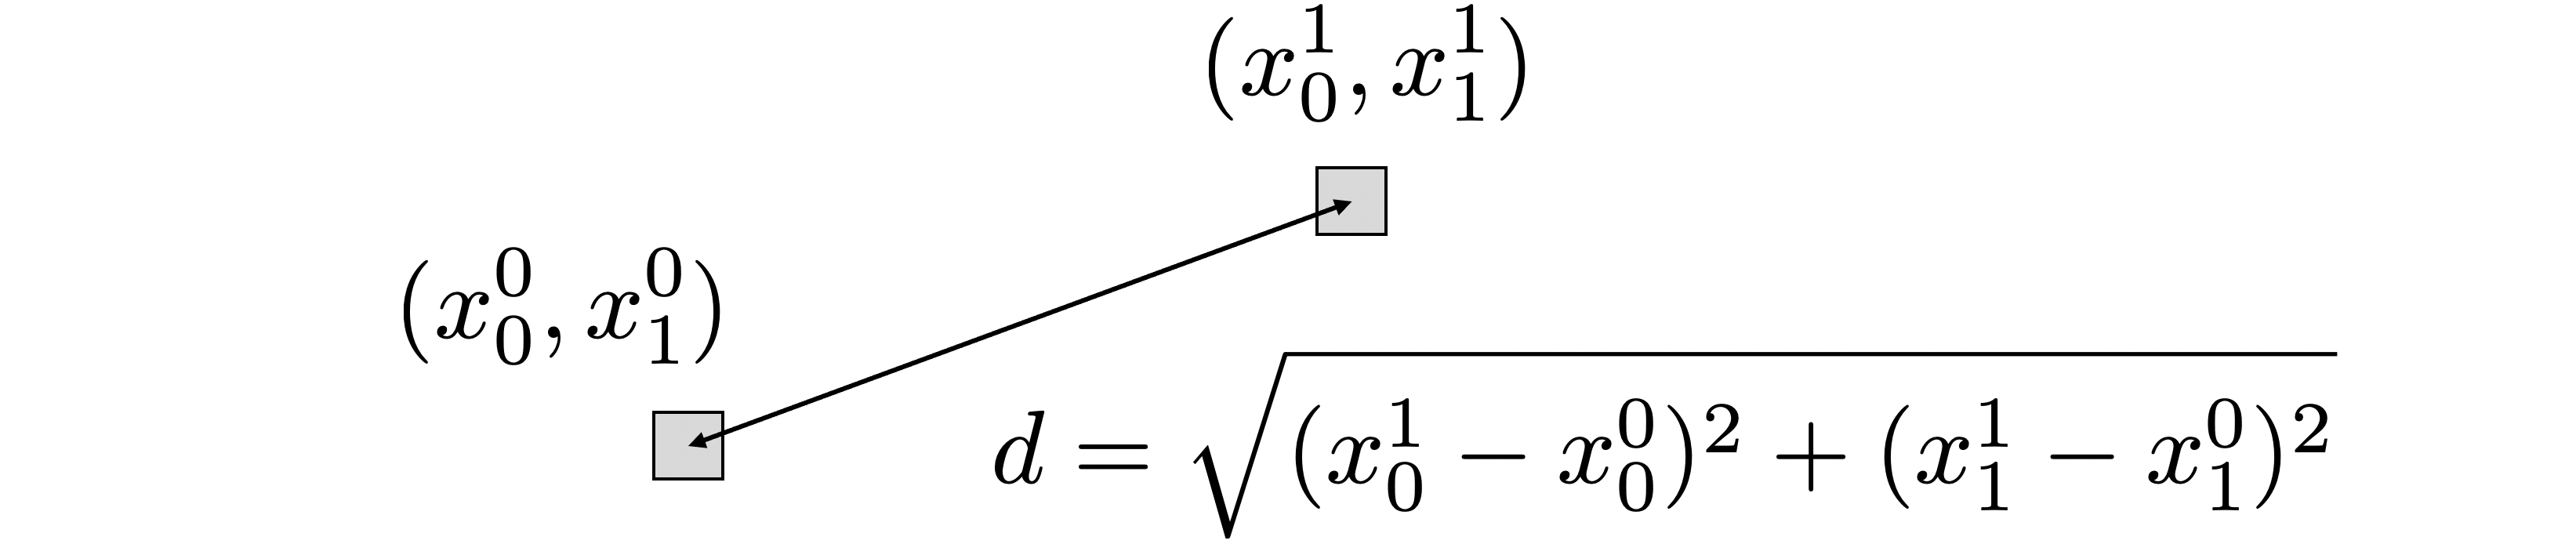

<font size=4><center>The KNN __assigns $y$ for a new example as the average value of $y$ among $K$ nearest training examples__. This can be done for >2 dimensions.

<font size=4> KNN Can also be used for regression, instead of finding which class an observation belongs to, we predict its value. To do this, we find the K-nearest observations (the neighbors), and average their values. 
    $$\hat f(x_0)=\frac{1}{K}\sum_{x_i\in N_0}y_i$$

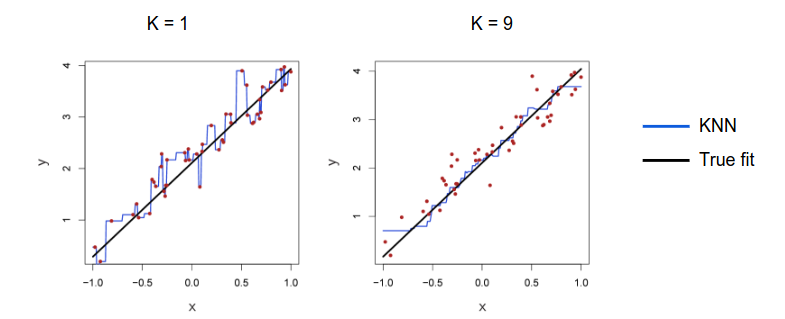

## 4. Hyperparameters

<font size=4> When training machine learning models, we make choices about the models before the training. These choices are called hyperparameters. 

<font size=4> During training, the model will be fit to the data, and the values that are changed to fit the model to the data are called parameters. We don't directly choose parameters, though they may be affected by our choice of hyperparameters. 
    
<font size=4> For example, when we are thinking about linear regression, specifically regularized linear regression (Lasso or Ridge), we can choose the weights that we use for regularization term (how much we penalize large coefficients). This will ultimately change the parameters, and how well the model will fit the data. It also significantly affects the over and underfitting of the data, and so will change not only how well the model fits the training data, but also how well it fits the testing data. 
    
<font size=4> But then, how do we choose these hyperparameters?
    
<font size=4> What about training the model, then test against the test set, and change the parameters till we find the best set of hyperparameters?
    
<font size=4> This means you are really fitting to the test set as well as the training set. So evaluating against the test set no longer actually tells you anything about how well your model will generalize. 
    
<font size=4> Instead, we can divide our training data into a training set, and a validation set. We will train the model against the training set, and evaluate it against the validation set. Then, we can try and improve the model by varying it's hyperparameters, testing against the validation set, and then checking to see if we have improved the fit. We still have a test set to test against once we find the best hyperparameters. 

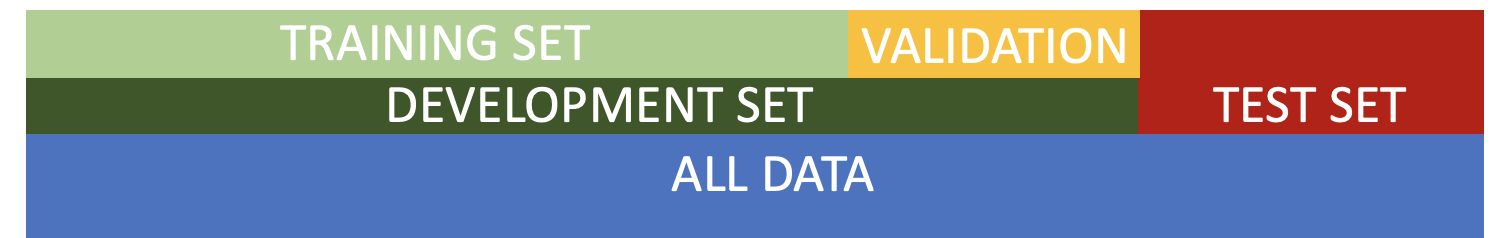

<font size=4> This can run into simmilar issues as before, since once you test against your test set, you can't go back and adjust your model. So, what if you overfit to your training set?
    
<font size=4> One solution to this is called cross validation, where instead of having a single hold out validation set, we have several, and so we can compare how our hyperparameters affect the fits to different samples. 
    
<font size=4> Another advantage of this is that it gives you a better idea of the variability of your model, since you have more than just a single number to evaluate how well your model performs for a given set of hyperparameters, 

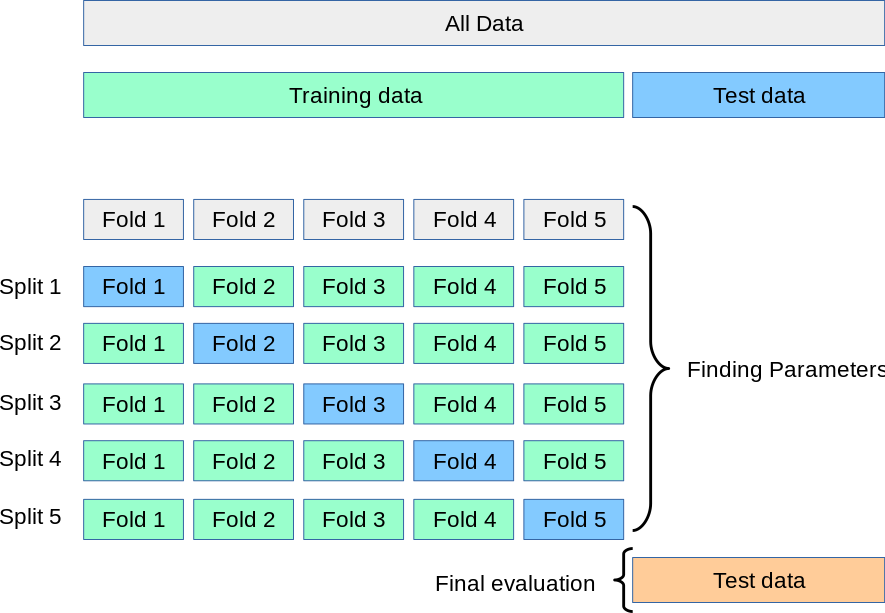

## 5. Excercises

### Setup

In [2]:
data = pd.read_csv('http://faculty.washington.edu/dacb/HCEPDB_moldata.zip')
df = data.sample(500, random_state=42)
df.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
1127317,495233,c1cc2c(scc2[se]1)-c1cc2cnc3c4[se]ccc4c4cocc4c3...,C21H9NO2SSe2,497.2931,3.274334,0.732747,68.772742,-5.332747,2.202482,-3.130265,c1cc2c3cocc3c3c4oc(cc4cnc3c2[se]1)-c1scc2[se]c...
2030049,29696,c1cc2csc(-c3cc4oc5c(sc6ccc7c[nH]cc7c56)c4c4csc...,C24H11NOS4,457.6209,1.821964,0.272779,102.796143,-4.872779,1.948411,-2.924368,c1sc(-c2cc3oc4c(sc5ccc6c[nH]cc6c45)c3c3cscc23)...
360133,187978,c1cc2ccc3c4[nH]c(cc4c4nsnc4c3c2s1)-c1nccc2nsnc12,C19H8N6S3,416.5122,0.000000,0.000000,0.000000,-5.643738,1.642855,-4.000884,[nH]1c(cc2c3nsnc3c3c4sccc4ccc3c12)-c1nccc2nsnc12
1709897,2692193,c1[nH]cc2c1c1cc(cnc1c1ccc3ccccc3c21)-c1cccc2cc...,C29H18N2,394.4752,1.327089,0.766442,26.648226,-5.366442,2.693662,-2.672780,c1ccc2c(ccc3c4ncc(cc4c4c[nH]cc4c23)-c2cccc3ccc...
1359587,596643,[SiH2]1C=c2ccc3sc4c(ccc5cc(oc45)-c4cccc5cscc45...,C24H14OS2Si,410.5916,5.416927,0.601450,138.612129,-5.201450,1.743136,-3.458314,c1ccc(-c2cc3ccc4c(sc5ccc6=C[SiH2]C=c6c45)c3o2)...


1. Using the HCEPDB data, perform a linear regression to predict e_lumo_alpha using VOC, JSC, and mass as features. 

2. Create a new column called e_lumo_high, which is 1 when e_lumo_alpha is greater than the median, and 0 otherwise. Perform a logistic regression with VOC, JSC, and mass as features and this new column as the target. 

3. Perform a KNN regression with e_lumo_alpha as the target, and VOC, JSC, and mass as the features. 

4. Compare the $R^2$ values for the linear regressor created in question 1, and the KNN regressor created in question 3.   
  
  
Hint: The score method (`.score`) returns the $R^2$ value